In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
from sklearn import metrics
from sklearn.model_selection import train_test_split

1. satisfaction_level - Уровень удовлетворенности работой
2. Last_evaluation - Время с момента последней оценки в годах
3. number_projects - Количество проектов, выполненных за время работы
4. average_monthly_hours - Среднее количество часов на рабочем месте в месяц
5. time_spend_company - Стаж работы в компании в годах
6. work_accident - Происходили ли несчастные случаи на рабочем месте с сотрудником
7. left - уволился ли сотрудник
8. promotion_last_5years - повышался ли сотрудник за последние пять лет
9. department - отдел в котором работает сотрудник
10. salary - относительный уровень зарплаты

In [2]:
df = pd.read_csv('/Users/shu/netology/files_from_netology/HR.csv')


In [3]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [4]:
df.shape

(14999, 10)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [6]:
# Есть дубли

df.duplicated().sum()

3008

In [7]:
# пропущенных данных нет

df.isna().any()

satisfaction_level       False
last_evaluation          False
number_project           False
average_montly_hours     False
time_spend_company       False
Work_accident            False
left                     False
promotion_last_5years    False
department               False
salary                   False
dtype: bool

In [8]:
# Рассчитываем основные статистики

df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [9]:
# Рассчитаем моду

df.mode().drop(index=1)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.1,0.55,4.0,135,3.0,0.0,0.0,0.0,sales,low


/var/folders/ks/bqxz1yvx2mjcsnh9lynjm30c0000gn/T/ipykernel_53203/641688998.py:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr().round(2), annot = True, square = True, linewidths=1, linecolor='black')


<Axes: >

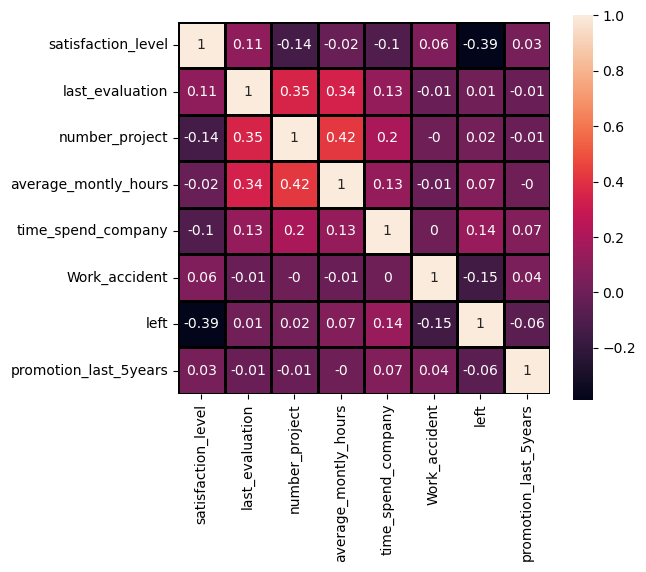

In [10]:
# смотрим на корреляцию данных на тепловой карты

plt.figure(figsize= (6, 5))

sns.heatmap(df.corr().round(2), annot = True, square = True, linewidths=1, linecolor='black')

* Наиболее скоррелированные данные у столбцов average_montly_hours и number_project

* Наименее скоррелированные данные у столбцов left и satisfaction_level	

In [11]:
# Рассчитываем кол-во сотрудников в каждом отделении

df.groupby('department').agg({'department':'count'}).rename(columns={'department':'count'})\
                                                    .sort_values('count', ascending=False)

,count
department,
sales,4140
technical,2720
support,2229
IT,1227
product_mng,902
marketing,858
RandD,787
accounting,767
hr,739


In [12]:
df.groupby(['department','salary']).agg({'department':'count'}).rename(columns={'department':'count'})\
#                                                              .sort_values('count', ascending=True)

count
department  salary       
IT          high       83
            low       609
            medium    535
RandD       high       51
            low       364
            medium    372
accounting  high       74
            low       358
            medium    335
hr          high       45
            low       335
            medium    359
management  high      225
            low       180
            medium    225
marketing   high       80
            low       402
            medium    376
product_mng high       68
            low       451
            medium    383
sales       high      269
            low      2099
            medium   1772
support     high      141
            low      1146
            medium    942
technical   high      201
            low      1372
            medium   1147

### Проверить гипотезу, что сотрудники с высоким окладом проводят на работе больше времени, чем сотрудники с низким окладом

In [13]:
# Отобрали необходимые столбцы

df_sample = df[['average_montly_hours', 'salary']]

In [14]:
for num, column in enumerate(df_sample.salary.value_counts().index):
    df_sample.loc[ df_sample.salary == column, 'salary_category' ] = num

/var/folders/ks/bqxz1yvx2mjcsnh9lynjm30c0000gn/T/ipykernel_53203/3267379837.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sample.loc[ df_sample.salary == column, 'salary_category' ] = num


In [15]:
df_sample.salary_category = df_sample.salary_category.astype('int')

/var/folders/ks/bqxz1yvx2mjcsnh9lynjm30c0000gn/T/ipykernel_53203/197651373.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sample.salary_category = df_sample.salary_category.astype('int')


In [16]:
df_sample.head()

,average_montly_hours,salary,salary_category
0,157,low,0
1,262,medium,1
2,272,medium,1
3,223,low,0
4,159,low,0


In [17]:
# Первая выборка с низкой зп

one_sample = df_sample.loc[ df_sample.salary_category == 0, ['average_montly_hours', 'salary_category'] ]\
                      .sample(n=1237, random_state=72)

In [18]:
# Вторая выборка с высокой зп

two_sample = df_sample.loc[df_sample.salary_category == 2, ['average_montly_hours', 'salary_category']]

In [19]:
len(one_sample), len(two_sample)

(1237, 1237)

In [20]:
# Проверяем распределение

import scipy.stats as st

for sample in [one_sample, two_sample]:

    stat, p = st.shapiro(sample.average_montly_hours)

    # H0 : (нулевая гипотеза) Распределение нормальное.
    # H1 : (альтернативная гипотеза) Распределение не нормальное


    print(f'Статистика= {stat:.4f}, p= {p: .4f}')

    if p > 0.05:
        print('Не отклоняем нулевую гипотезу, распределение, вероятно, нормальное' )
    else:
        print('Отклоняем нулевую гипотезу, распределение, вероятно, не нормально' )

Статистика= 0.9614, p=  0.0000
Отклоняем нулевую гипотезу, распределение, вероятно, не нормально
Статистика= 0.9712, p=  0.0000
Отклоняем нулевую гипотезу, распределение, вероятно, не нормально


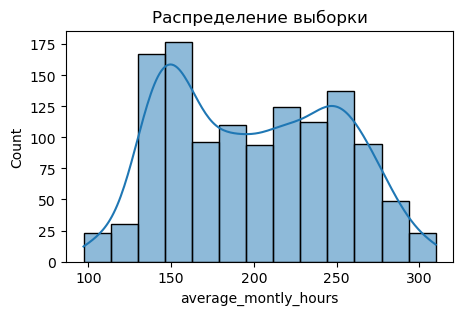

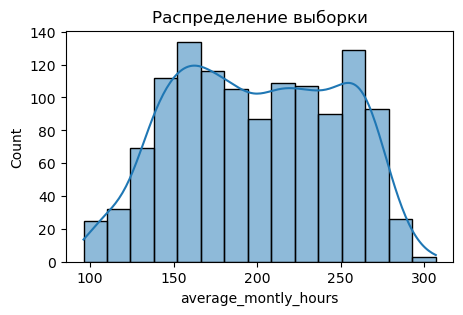

In [21]:
for sample in [one_sample, two_sample]:
    
    plt.figure(figsize=(5,3))
    plt.title(f'Распределение выборки')
    sns.histplot(sample.average_montly_hours, kde=True)

In [22]:
# Тест Фишера - определяем зависимы ли группы между собой

def f_test(group1, group2):
    f = np.var(group1, ddof=1)/np.var(group2, ddof=1)
    nun = group1.size - 1
    dun = group2.size - 1
    p_value = 1 - st.f.cdf(f, nun, dun)
    return f, p_value

In [23]:
stat, p = f_test(one_sample.average_montly_hours, two_sample.average_montly_hours)
                                             
print(f'Статистика= {stat:.4f}, p= {p: .4f}')
      
# H0 : (нулевая гипотеза) Две переменные независимы.
# H1 : (альтернативная гипотеза) Две переменные зависимые.
    
if p > 0.05:
    print('Не отклоняем нулевую гипотезу, выборки, вероятно, независимы' )
else:
    print('Отклоняем нулевую гипотезу, выборки, вероятно, зависимые' )

Статистика= 1.1201, p=  0.0231
Отклоняем нулевую гипотезу, выборки, вероятно, зависимые


Распределение не нормальное, группы являются зависимыми, поэтому для сравнения используем критерий Вилкоксона

In [24]:
stat, p = st.wilcoxon(one_sample.average_montly_hours, two_sample.average_montly_hours)


# H0: распределения обоих образцов равны.
# H1: распределения обоих образцов не равны.


print(f'Статистика= {stat:.4f}, p= {p: .4f}')


if p > 0.05:
    print('Не отклоняем нулевую гипотезу, образцы, вероятно, одинаковые ' )
else:
    print('Отклоняем нулевую гипотезу, образцы, вероятно, различаются' )


Статистика= 376688.0000, p=  0.9213
Не отклоняем нулевую гипотезу, образцы, вероятно, одинаковые 


Можно сделать вывод, что нет значимых различий, что работники с высоким окладом проводят больше времени на работе, чем работники с низким окладом

### Рассчитать следующие показатели среди уволившихся и не уволившихся сотрудников (по отдельности):
● Доля сотрудников с повышением за последние 5 лет

● Средняя степень удовлетворенности

● Среднее количество проектов

In [25]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [26]:
# Получается, что те кто уволился и их не повышали за последние 5 лет - 99%

df.groupby('left').promotion_last_5years.value_counts(True).round(2)

left  promotion_last_5years
0     0                        0.97
      1                        0.03
1     0                        0.99
      1                        0.01
Name: promotion_last_5years, dtype: float64

In [27]:
# Те кто остался работать удовлетворенны работой почти на 30% больше чем уволившиеся

df.groupby('left').satisfaction_level.mean().round(2)

left
0    0.67
1    0.44
Name: satisfaction_level, dtype: float64

In [28]:
# В среднем кол-во проектов почти одинаковое

df.groupby('left').number_project.mean().round(2)

left
0    3.79
1    3.86
Name: number_project, dtype: float64

### Задание построить модель LDA
* Разделить данные на тестовую и обучающую выборки. 
* Построить модель LDA, предсказывающую уволился ли сотрудник на основе имеющихся факторов (кроме department и salary)
* Оценить качество модели на тестовой выборки

In [29]:
x = df.iloc[:, :8].drop('left', axis=1)
y = df.left

In [30]:
x.shape, df.shape, y.shape

((14999, 7), (14999, 10), (14999,))

In [31]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=43)

In [32]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [33]:
lda = LinearDiscriminantAnalysis()

In [34]:
lda.fit(x_train, y_train)

LinearDiscriminantAnalysis()

In [35]:
lda.coef_

array([[-4.55617994e+00,  8.03235487e-01, -2.42266371e-01,
         4.54370315e-03,  2.19696340e-01, -1.08040214e+00,
        -1.12600348e+00]])

In [36]:
lda.intercept_

array([0.11896066])

In [37]:
pred = lda.predict(x_test)

In [38]:
pred

array([0, 1, 0, ..., 0, 0, 0])

In [39]:
from sklearn.metrics import accuracy_score

In [40]:
accuracy_score(y_test, pred)

0.7624

Мы можем построить кривую ROC (рабочая характеристика приемника), которая отображает процент истинных положительных результатов, предсказанных моделью, поскольку отсечка вероятности прогнозирования снижается с 1 до 0.
Чем выше AUC (площадь под кривой), тем точнее наша модель может предсказывать результаты

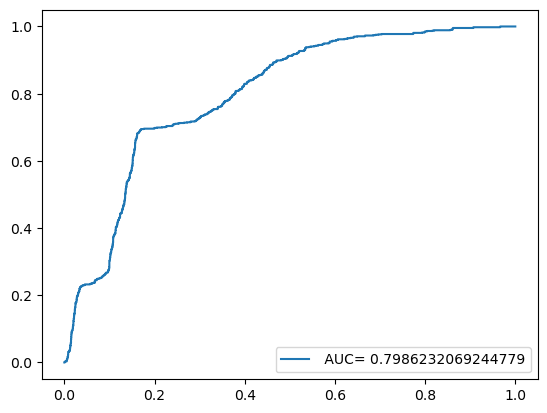

In [41]:
#define metrics

y_pred_proba = lda.predict_proba(x_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)
auc = metrics.roc_auc_score (y_test, y_pred_proba)

#create ROC curve

plt.plot(fpr,tpr,label=" AUC= " + str(auc))
plt.legend(loc=4)
plt.show()